# Pengelompokan Wilayah Berdasarkan Tingkat Paparan Covid-19 dengan K-Means Clustering

### Import Library

In [1]:
import pandas as pd
import numpy as np

### Import Dataset

In [2]:
# Import Dataset
df = pd.read_csv('data1_covid_dki_detailed_clean.csv')

# Preview Dataset
df

,Unnamed: 0,id_kel,tanggal2,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,positif,dirawat,sembuh,...,pelaku_perjalanan,self_isolation,perawatan_rs,isolasi_di_rumah,selesai_isolasi,suspek,suspek_meninggal,probable,probable_meninggal,discarded
0,5344,3172051003,2020-07-14,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,39.0,2.0,33.0,...,5.0,4.0,4.0,0.0,100.0,104.0,0.0,0.0,0.0,4.0
1,5345,3173041007,2020-07-14,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,45.0,4.0,29.0,...,0.0,10.0,0.0,0.0,179.0,180.0,1.0,0.0,0.0,22.0
2,5346,3175041005,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,22.0,1.0,16.0,...,2.0,4.0,4.0,0.0,51.0,55.0,0.0,0.0,0.0,22.0
3,5347,3175031003,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,6.0,0.0,5.0,...,0.0,0.0,0.0,0.0,32.0,33.0,1.0,0.0,0.0,0.0
4,5348,3175101006,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,22.0,3.0,15.0,...,2.0,4.0,0.0,1.0,102.0,104.0,1.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28297,34442,3175011006,2020-11-30,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,396.0,2.0,369.0,...,8.0,16.0,13.0,35.0,650.0,706.0,8.0,2.0,0.0,98.0
28298,34443,3175011002,2020-11-30,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,338.0,1.0,305.0,...,6.0,18.0,5.0,242.0,540.0,787.0,0.0,4.0,0.0,49.0
28299,34444,3171031008,2020-11-30,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,355.0,1.0,332.0,...,4.0,12.0,1.0,44.0,494.0,541.0,2.0,0.0,0.0,31.0
28300,34445,3172021007,2020-11-30,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,472.0,4.0,441.0,...,12.0,19.0,1.0,65.0,792.0,860.0,2.0,0.0,0.0,70.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28302 entries, 0 to 28301
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          28302 non-null  int64  
 1   id_kel              28302 non-null  int64  
 2   tanggal2            28302 non-null  object 
 3   nama_provinsi       28302 non-null  object 
 4   nama_kota           28302 non-null  object 
 5   nama_kecamatan      28302 non-null  object 
 6   nama_kelurahan      28302 non-null  object 
 7   positif             28302 non-null  float64
 8   dirawat             28302 non-null  float64
 9   sembuh              28302 non-null  float64
 10  meninggal           28302 non-null  float64
 11  kontak_erat         28302 non-null  float64
 12  pelaku_perjalanan   28302 non-null  float64
 13  self_isolation      28302 non-null  float64
 14  perawatan_rs        28302 non-null  float64
 15  isolasi_di_rumah    28302 non-null  float64
 16  sele

### Memilih Feature yang Diperlukan

Feature yang akan dipilih adalah feature yang berkaitan dengan tingkat paparan covid-19 seperti positif, dirawat, kotak_erat, pelaku_perjalanan, dll.  

In [4]:
# Memilih Feature
feature = ['positif', 'dirawat', 'kontak_erat', 'pelaku_perjalanan', 'self_isolation', 
          'perawatan_rs', 'isolasi_di_rumah', 'suspek', 'probable', 'discarded']

# Membuat Dataframe
df_cluster = df[feature]

# Cek kolom
df_cluster.columns

Index(['positif', 'dirawat', 'kontak_erat', 'pelaku_perjalanan',
       'self_isolation', 'perawatan_rs', 'isolasi_di_rumah', 'suspek',
       'probable', 'discarded'],
      dtype='object')

### Melihat Korelasi antar Feature

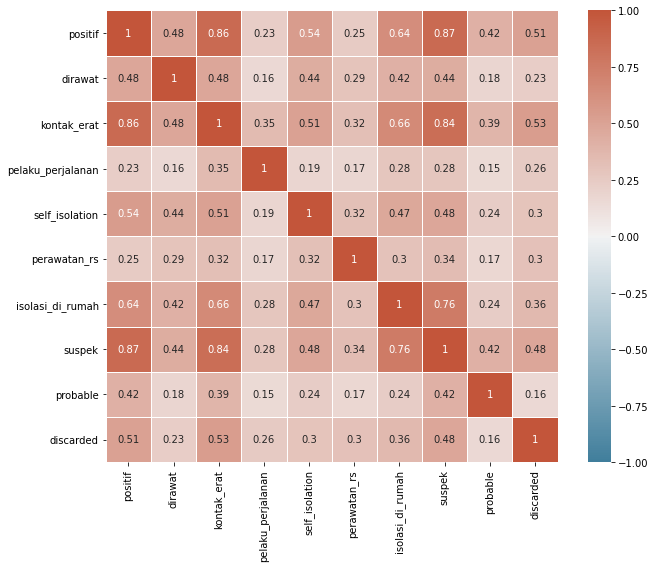

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_cluster.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap=cmap, annot=True, center=0, vmin=-1,
            square=True, linewidths=.5)
plt.tight_layout()
plt.show()

Nampaknya, terdapat korelasi positif antar feature dengan nilai korelasi yang cukup beragam antara 0,1 sampai 0,9.

### Melakukan Standardisasi pada Tiap Feature

Sebelum melakukan clustering, perlu dilakukan standardisasi supaya tidak ada feature yang mendominasi pengelompokan dikarenakan skala tiap feature yang berbeda-beda.

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardisasi  
df_model = StandardScaler().fit_transform(df_cluster)  

# Membuat DataFrame  
df_model = pd.DataFrame(data=df_model, index=df_cluster.index, columns=df_cluster.columns)  

# Preview Dataset
df_model.describe().round(2)

,positif,dirawat,kontak_erat,pelaku_perjalanan,self_isolation,perawatan_rs,isolasi_di_rumah,suspek,probable,discarded
count,28302.00,28302.00,28302.00,28302.00,28302.00,28302.00,28302.00,28302.00,28302.00,28302.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.31,-1.11,-1.36,-0.72,-1.17,-1.16,-0.99,-1.33,-0.64,-0.94
25%,-0.78,-0.69,-0.73,-0.53,-0.72,-0.66,-0.65,-0.73,-0.64,-0.65
50%,-0.19,-0.27,-0.22,-0.34,-0.21,-0.17,-0.26,-0.21,-0.07,-0.29
75%,0.53,0.36,0.45,0.13,0.47,0.56,0.33,0.46,0.50,0.33
max,5.29,8.98,6.28,8.70,13.92,10.64,11.56,7.00,9.62,9.30


### Menentukan Jumlah Cluster

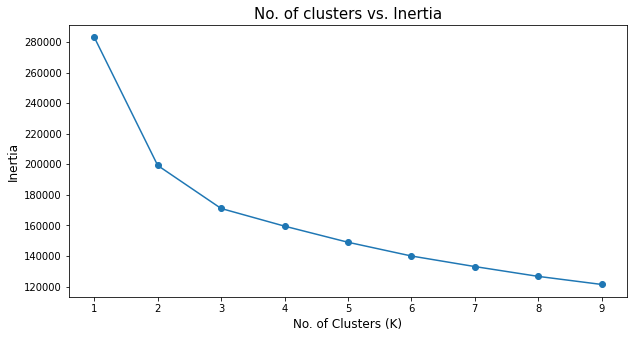

In [7]:
from sklearn.cluster import KMeans

options = range(1,10)
inertias = []

# Cluster vs Inertia
for n_clusters in options:
    model = KMeans(n_clusters, random_state=0).fit(df_model)
    inertias.append(model.inertia_)

# Plot hasil
plt.figure(figsize=(10,5))    
plt.title("No. of clusters vs. Inertia", fontsize=15)
plt.plot(options, inertias, '-o')
plt.xlabel('No. of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.show()

Jika menggunakan elbow method, jumlah cluster yang disarankan untuk clustering kali ini adalah 3 cluster.

### Membuat Model

In [8]:
# Inisiasi Model
n = 3
model = KMeans(n_clusters=n, random_state=0).fit(df_model)

# Membuat Cluster
predict = model.predict(df_model)

# Mengurutkan Cluster supaya tidak tertukar tiap run
idx = np.argsort(model.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(n)
predict = lut[predict]

# Menambahkan Cluster pada df_model
df_model['cluster'] = predict

### Interpretasi Cluster 

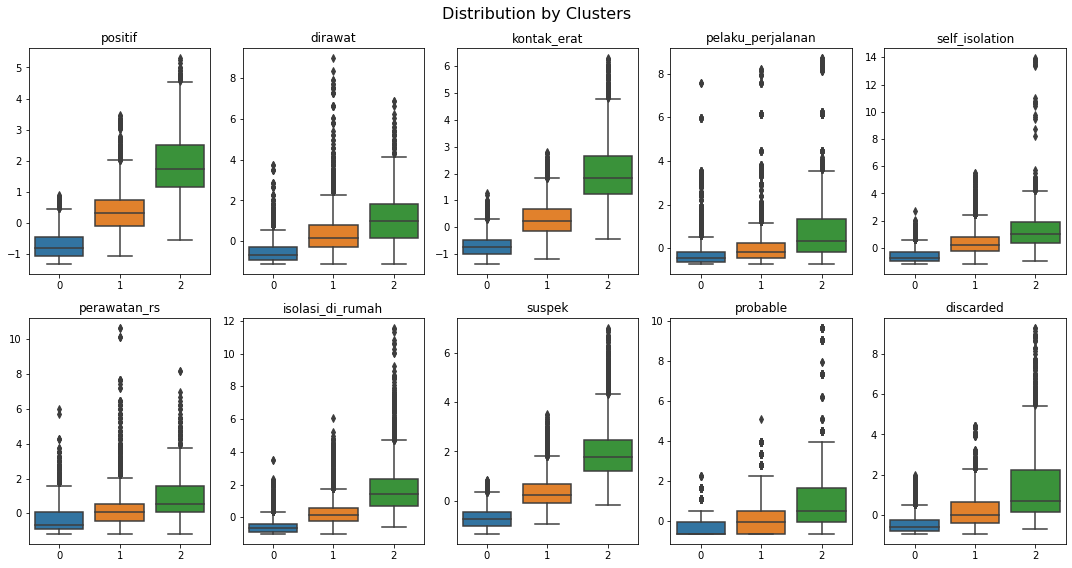

In [9]:
# Plot Distribusi
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(15,8))
for column, ax in zip(df_model.columns, axes.flat):
    sns.boxplot(data=df_model, x='cluster', y=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.suptitle('Distribution by Clusters', size=16)
plt.tight_layout()
plt.show()

Berdasarkan distribusi tiap variabel, kita bisa melihat pengelompokkan tiap cluster berdasarkan pada tingkat paparan covid-19. Jika kita lihat dari variabel positif, dirawat, dan kontak_erat; cluster 0 merupakan cluster yang paling rendah tingkat paparannya, cluster 1 memiliki tingkat paparan sedang, dan cluster 2 memiliki tingkat paparan tinggi. Hasil interpretasi ini bisa digunakan untuk melihat mana daerah-daerah yang memiliki tingkat paparan covid-19 yang tinggi.

### Renaming Cluster

Setelah mengetahui karakteristik cluster, kita bisa menamai cluster masing-masing seusai tingkat paparannya.

In [10]:
# Menambahkan dan menamai cluster pada dataset utama
df['tingkat_paparan'] = df_model['cluster'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'})

### Melihat Wilayah dengan Paparan Tinggi Covid-19

#### Wilayah Paparan Tinggi di Tingkat Kelurahan

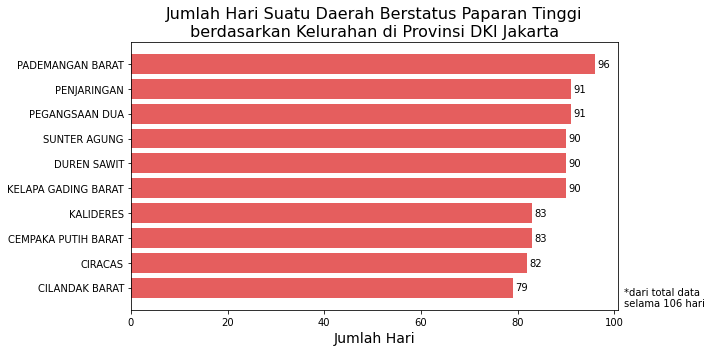

In [11]:
# Membuat Variabel
paparan_kelurahan = df.groupby(['tingkat_paparan', 'nama_kota', 'nama_kecamatan', 'nama_kelurahan'])['tanggal2'].count().reset_index(name='jumlah_hari')
paparan_kelurahan_tinggi = paparan_kelurahan[paparan_kelurahan['tingkat_paparan'] == 'Tinggi'].sort_values(by='jumlah_hari', ascending=False).head(10)

# Plot Data
plt.figure(figsize=(10,5))
plt.barh(data=paparan_kelurahan_tinggi, y='nama_kelurahan', width='jumlah_hari', color='#e55e5e')
plt.title('Jumlah Hari Suatu Daerah Berstatus Paparan Tinggi\nberdasarkan Kelurahan di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(paparan_kelurahan_tinggi['jumlah_hari'])):
    plt.text(x=v+0.5, y=i , s=v, va='center')
plt.text(x=102, y=9.4, s='*dari total data\nselama 106 hari', va='center')
plt.xlabel('Jumlah Hari', size=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Di tingkat kelurahan, beberapa kelurahan berada pada tingkat paparan tinggi selama lebih dari 90 hari seperti Kelurahan Pademangan Barat, Penjaringan, Pegangsaan Dua. Baiknya, pemerintah perlu berfokus menangani kelurahan-kelurahan dengan tingkat paparan covid-19 yang tinggi. 

#### Wilayah Paparan Tinggi di Tingkat Kota

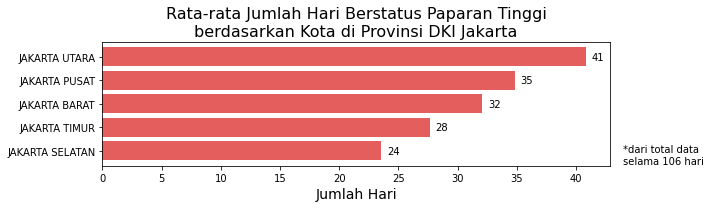

In [12]:
# Membuat Variabel
paparan_kota = paparan_kelurahan.groupby(['tingkat_paparan', 'nama_kota'])['jumlah_hari'].mean().reset_index()
paparan_kota_tinggi = paparan_kota[paparan_kota['tingkat_paparan'] == 'Tinggi'].sort_values(by='jumlah_hari', ascending=False)

# Plot Data
plt.figure(figsize=(10,3))
plt.barh(data=paparan_kota_tinggi, y='nama_kota', width='jumlah_hari', color='#e55e5e')
plt.title('Rata-rata Jumlah Hari Berstatus Paparan Tinggi\nberdasarkan Kota di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(paparan_kota_tinggi['jumlah_hari'])):
    plt.text(x=v+0.5, y=i , s='{:.0f}'.format(v), va='center')
plt.text(x=44, y=4.2, s='*dari total data\nselama 106 hari', va='center')
plt.xlabel('Jumlah Hari', size=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Jika berdasarkan jumlah rata-rata, tiap daerah di Jakarta Utara masuk ke dalam status paparan tinggi selama 41 hari, Jakarta Pusat selama 35 hari, Jakarta Barat selama 32 hari, Jakarta Timur selama 28 hari, Jakarta Selatan selama 24 hari.

### Sebaik Apa Penanganan Pemerintah?

#### Tingkat Kematian di Kelurahan

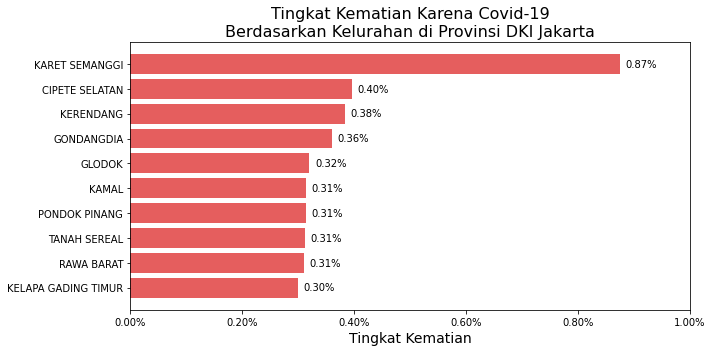

In [13]:
# Membuat Variabel
meninggal_kelurahan = df.groupby(['nama_kota', 'nama_kecamatan', 'nama_kelurahan'])[['sembuh','meninggal']].sum().reset_index()
meninggal_kelurahan['tingkat_kematian'] = meninggal_kelurahan['meninggal'] / (meninggal_kelurahan['sembuh'] + meninggal_kelurahan['meninggal'])
meninggal_kelurahan_top10 = meninggal_kelurahan.sort_values(by='tingkat_kematian', ascending=False).head(10)

# Plot Data
plt.figure(figsize=(10,5))
plt.barh(data=meninggal_kelurahan_top10, y='nama_kelurahan', width='tingkat_kematian', color='#e55e5e')
plt.title('Tingkat Kematian Karena Covid-19\nBerdasarkan Kelurahan di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(meninggal_kelurahan_top10['tingkat_kematian'])):
    plt.text(x=v+0.0001, y=i , s='{:.2%}'.format(v), va='center')
plt.xlabel('Tingkat Kematian', size=14)
plt.xlim(0,0.01)
x = plt.gca().get_xticks()
plt.gca().set_xticks(x)
plt.gca().set_xticklabels(['{:,.2%}'.format(i) for i in x])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Menariknya, jumlah kematian di level kelurahan cukup rendah dengan karena dibawah 1%, jumlah tertinggi ada pada kelurahan karet semanggi dengan jumlah 0.87%.

#### Tingkat Kematian di Kota

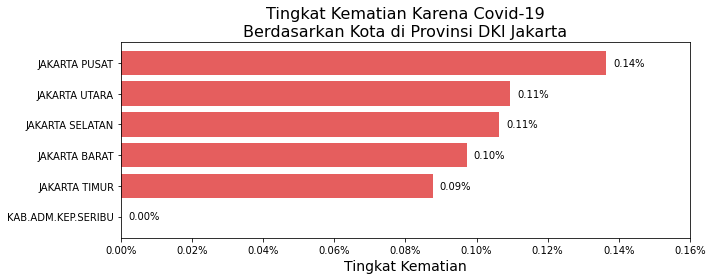

In [14]:
# Membuat Variabel
meninggal_kota = df.groupby(['nama_kota'])[['sembuh','meninggal']].sum().reset_index()
meninggal_kota['tingkat_kematian'] = meninggal_kota['meninggal'] / (meninggal_kota['sembuh'] + meninggal_kota['meninggal'])
meninggal_kota = meninggal_kota.sort_values(by='tingkat_kematian', ascending=False)

# Plot Data
plt.figure(figsize=(10,4))
plt.barh(data=meninggal_kota, y='nama_kota', width='tingkat_kematian', color='#e55e5e')
plt.title('Tingkat Kematian Karena Covid-19\nBerdasarkan Kota di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(meninggal_kota['tingkat_kematian'])):
    plt.text(x=v+0.00002, y=i , s='{:.2%}'.format(v), va='center')
plt.xlabel('Tingkat Kematian', size=14)
plt.xlim(0,0.0015)
x = plt.gca().get_xticks()
plt.gca().set_xticks(x)
plt.gca().set_xticklabels(['{:,.2%}'.format(i) for i in x])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Secara keseluruhan, jumlah kematian di tingkat kota cukup rendah dengan jumlah kematian terletak di jakarta pusat sebesar 0,14%.

Kesimpulan: Pada tahun 2020 penanganan covid-19 di provinsi DKI Jakarta sudah baik jika dilihat dari tingkat kematian yang rendah.

### Wilayah yang Perlu Diwaspadai?

Selain wilayah yang terpapar covid-19 dengan tingkat tinggi, pemprov DKI Jakarta juga perlu mewaspadai wilayah yang sering berada di tingkat paparan sedang.

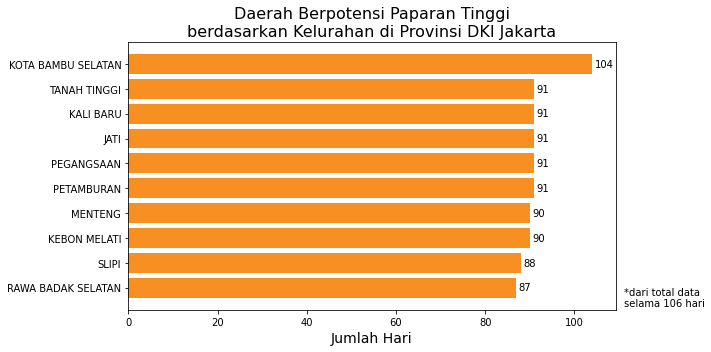

In [15]:
# Membuat Variabel
paparan_kelurahan_sedang = paparan_kelurahan[paparan_kelurahan['tingkat_paparan'] == 'Sedang'].sort_values(by='jumlah_hari', ascending=False).head(10)

# Plot Data
plt.figure(figsize=(10,5))
plt.barh(data=paparan_kelurahan_sedang, y='nama_kelurahan', width='jumlah_hari', color='#f78f22')
plt.title('Daerah Berpotensi Paparan Tinggi\nberdasarkan Kelurahan di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(paparan_kelurahan_sedang['jumlah_hari'])):
    plt.text(x=v+0.5, y=i , s=v, va='center')
plt.text(x=111, y=9.4, s='*dari total data\nselama 106 hari', va='center')
plt.xlabel('Jumlah Hari', size=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Wilayah-wilayah di atas merupakan wilayah yang perlu diwaspadai. Sebagai contoh kelurahan Kota Bambu Selatan sudah berada pada tingkat paparan sedang selama 104 hari dari 106 hari data. Hal ini menunjukan bahwa Kota Bambu Selatan sangat berpotensi untuk menjadi wilayah dengan tingkat paparan yang tinggi.